# 单变量房价预测

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
sns.set(context="notebook", style="whitegrid", palette="dark")

In [6]:
df0 = pd.read_csv('../data/house-price/train.csv')
df0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


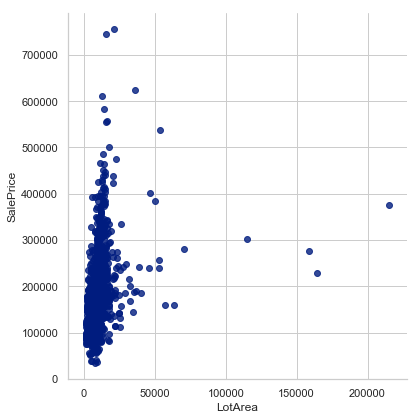

In [8]:
df1 = df0[['LotArea', 'SalePrice']]
sns.lmplot('LotArea', 'SalePrice', df1, height=6, fit_reg=False)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
LotArea      1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(2)
memory usage: 22.9 KB


# 多变量房价预测

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [11]:
df2 = df0[['LotArea', 'BedroomAbvGr', 'SalePrice']]
df2.head()

,LotArea,BedroomAbvGr,SalePrice
0,8450,3,208500
1,9600,3,181500
2,11250,3,223500
3,9550,3,140000
4,14260,4,250000


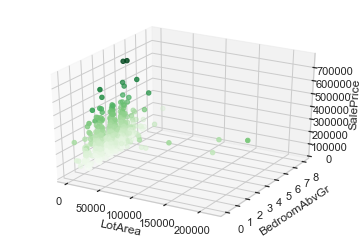

In [12]:
fig = plt.figure()
# 创建3d object
ax = plt.axes(projection='3d')
ax.set_xlabel("LotArea")
ax.set_ylabel("BedroomAbvGr")
ax.set_zlabel("SalePrice")
# plot
ax.scatter3D(df2["LotArea"], df2["BedroomAbvGr"], df2["SalePrice"], c=df2["SalePrice"], cmap="Greens")

# 数据规范化

In [13]:
def normalize_feature(df):
    return df.apply(lambda col: (col - col.mean()) / col.std())
df3 = normalize_feature(df2)
df3.head()

,LotArea,BedroomAbvGr,SalePrice
0,-0.207071,0.163723,0.347154
1,-0.091855,0.163723,0.007286
2,0.073455,0.163723,0.535970
3,-0.096864,0.163723,-0.515105
4,0.375020,1.389547,0.869545


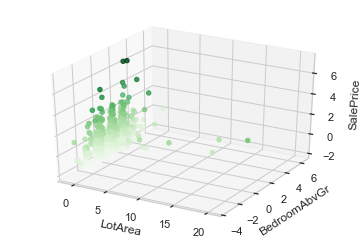

In [14]:
ax = plt.axes(projection='3d')
ax.set_xlabel("LotArea")
ax.set_ylabel("BedroomAbvGr")
ax.set_zlabel("SalePrice")
ax.scatter3D(df3["LotArea"], df3["BedroomAbvGr"], df3["SalePrice"], c=df3["SalePrice"], cmap="Greens")

In [16]:
import numpy as np
ones = pd.DataFrame({"ones": np.ones(len(df3))})

In [17]:
ones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
ones    1460 non-null float64
dtypes: float64(1)
memory usage: 11.5 KB


In [18]:
df4 = pd.concat([ones, df3], axis=1)
df4.head()

,ones,LotArea,BedroomAbvGr,SalePrice
0,1.0,-0.207071,0.163723,0.347154
1,1.0,-0.091855,0.163723,0.007286
2,1.0,0.073455,0.163723,0.535970
3,1.0,-0.096864,0.163723,-0.515105
4,1.0,0.375020,1.389547,0.869545
